# Titanic

#### 25/10/2023

* **1. Importing libriaries.**
* **2. Loading data and preprocessing.**
    * 2.1 Load data.
    * 2.2 Data dictionary.
    * 2.3 Outlier detection and removal.
* **3. Exploratory Data Analysis (EDA).**
    * 3.1 Explore data.
    * 3.2 Checking data for null and missing values.
* **4. Feature analysis.**
        4.1 Describing features.
        4.2 Categorical values.
        4.3 Numerical values.
* **5. Data preprocesing**
    * 5.1 Concatenating train and test set
    * 5.2 Filling missing Values

* **6 Feature engineering**
    * 6.1 Name/Title
    * 6.2 Cabin
    * 6.3 Age/Pclass
    * 6.4 Family Size
* **7 Modeling**
    * 7.1 Encoding features.
    
* 6.3 Applying ML models with evaluation (score, f1, precision, recall).
    * Logistic Regression.
    * SVC Support Vector Machines.
    * Linear SVC.
    * SGD - Stochastic Gradient Decent.
    * K- Nearest Neigbours.
    * GNB - Gaussian Naive Base.
    * Perceptron.
    * DTC - Decision Tree CLassifier.
    * RF - Random Forest (ensable method).
    * Catboost.
    * Adaboost.
* 6.4 Compering all models & chosing the best performing one.
* 6.5 One more look at features, engineered features, Ticket, trying new features and reload models.
* 6.6 Creating a pipeline with selected models, applying PCA, Select-K features, hyperparameter tuning and cross validation.
    * 6.1 Simple modeling
        * 6.1.1 Cross validate models
        * 6.1.2 Hyperparamater tunning for best models
        * 6.1.3 Plot learning curves
        * 6.1.4 Feature importance of the tree based classifiers
    * 6.2 Ensemble modeling
        * 6.2.1 Combining models
    * 6.3 Prediction
        * 6.3.1 Predict and Submit results

### 1. Importing libraries.

In [1538]:
import pandas as pd
import numpy as np
import missingno
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')


##### 2.1 Loading data.

In [1418]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('gender_submission.csv')

In [1419]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1420]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1421]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


##### 2.2  Data Dictionary:

* Survival: 0 = No, 1 = Yes
* Pclass: Ticket class 1 = 1st, 2 = 2nd  3 = rd
* SibSp: # of siblings / spouses aboard the Titanic
* Parch: # of parents / children aboard the Titanic
* Ticket: Ticket number
* Fare: Passenger fare
* Cabin: Cabin numer
* Age: Age in years 
* Sex: Sex of the passengers
* Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

##### 2.3 Outlier detection.

In [1422]:
def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n)
    return multiple_outliers

outliers = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])

In [1423]:
outliers

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [1424]:
print(len(train))
train = train.drop(outliers, axis=0).reset_index(drop=True)
len(train)

891


881

### 3. Exploratory Data Analysis (EDA)


#### 3.1 Exploring the data.

In [1425]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Name         881 non-null    object 
 4   Sex          881 non-null    object 
 5   Age          711 non-null    float64
 6   SibSp        881 non-null    int64  
 7   Parch        881 non-null    int64  
 8   Ticket       881 non-null    object 
 9   Fare         881 non-null    float64
 10  Cabin        201 non-null    object 
 11  Embarked     879 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


In [1426]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [1427]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,881.000000,881.000000,881.000000,711.000000,881.000000,881.000000,881.000000
mean,446.713961,0.385925,2.307605,29.731603,0.455165,0.363224,31.121566
std,256.617021,0.487090,0.835055,14.547835,0.871571,0.791839,47.996249
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,448.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [1428]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### 3.2 Checking data for null and missing values.

In [1429]:
train.isnull().sum().sort_values(ascending=False)

Cabin          680
Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [1430]:
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

<Axes: >

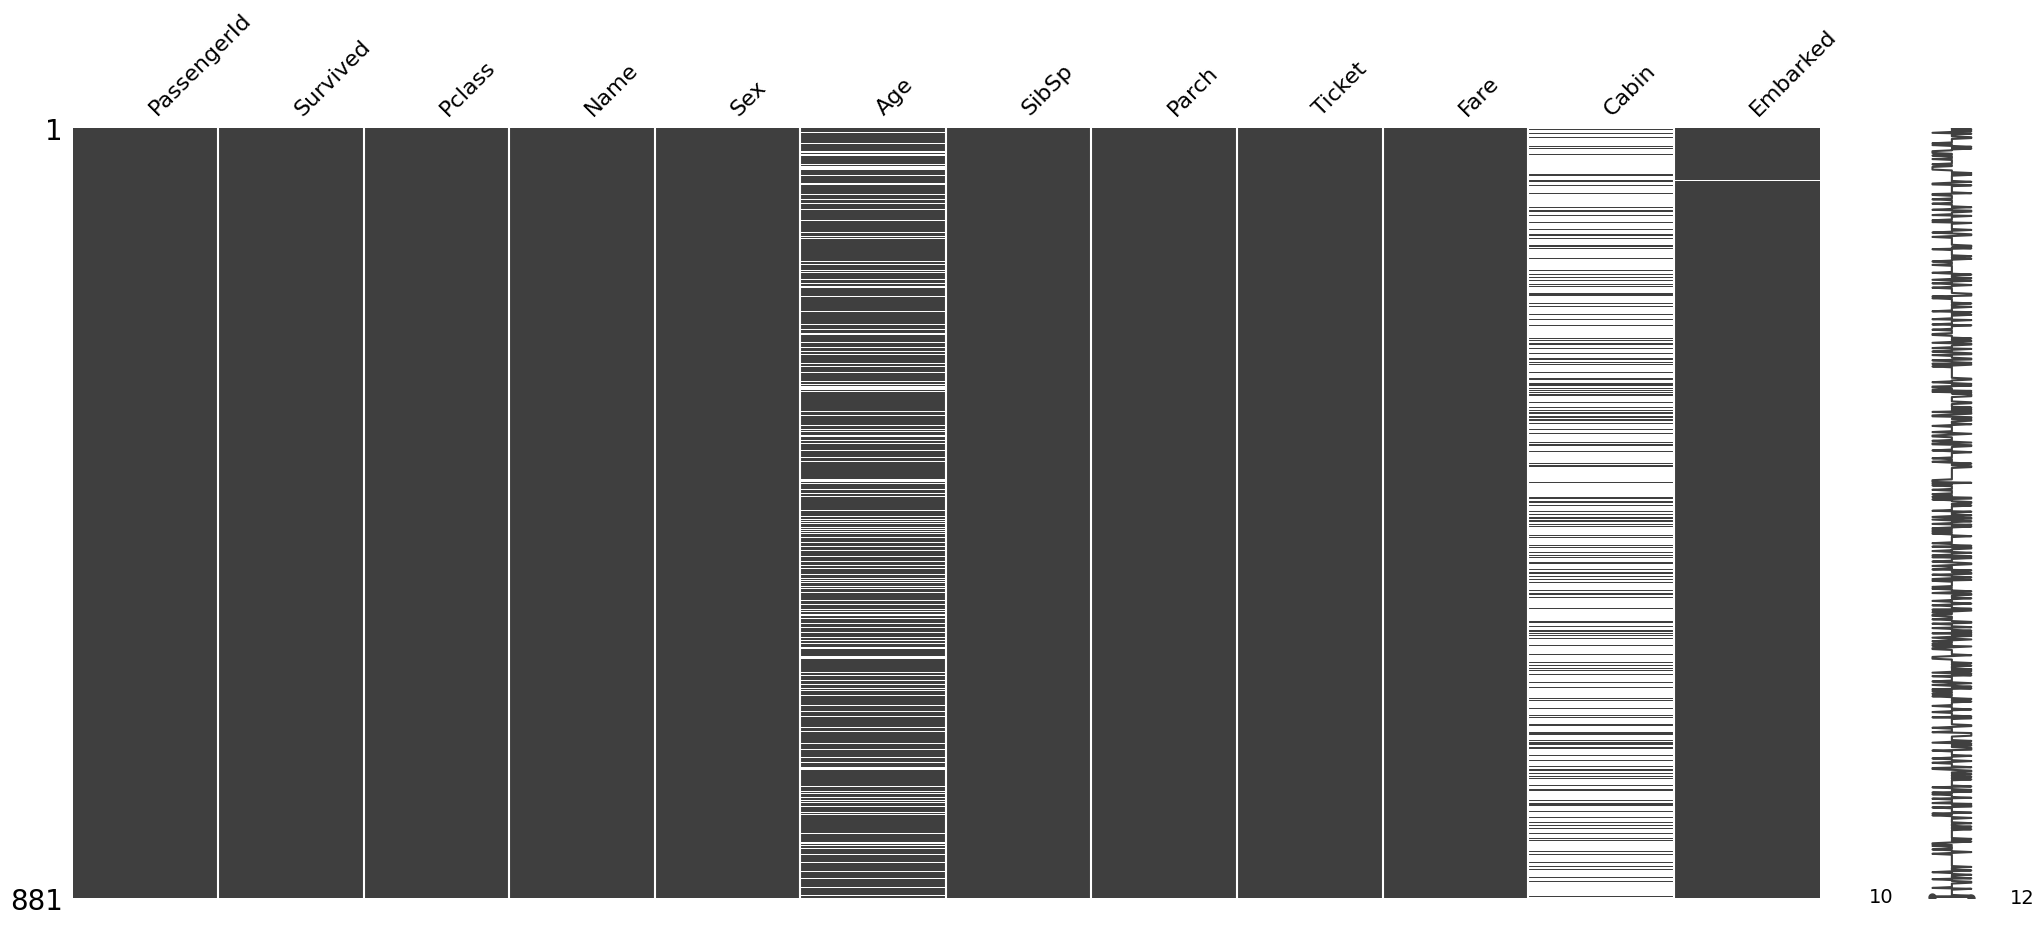

In [1431]:
missingno.matrix(train)

<Axes: >

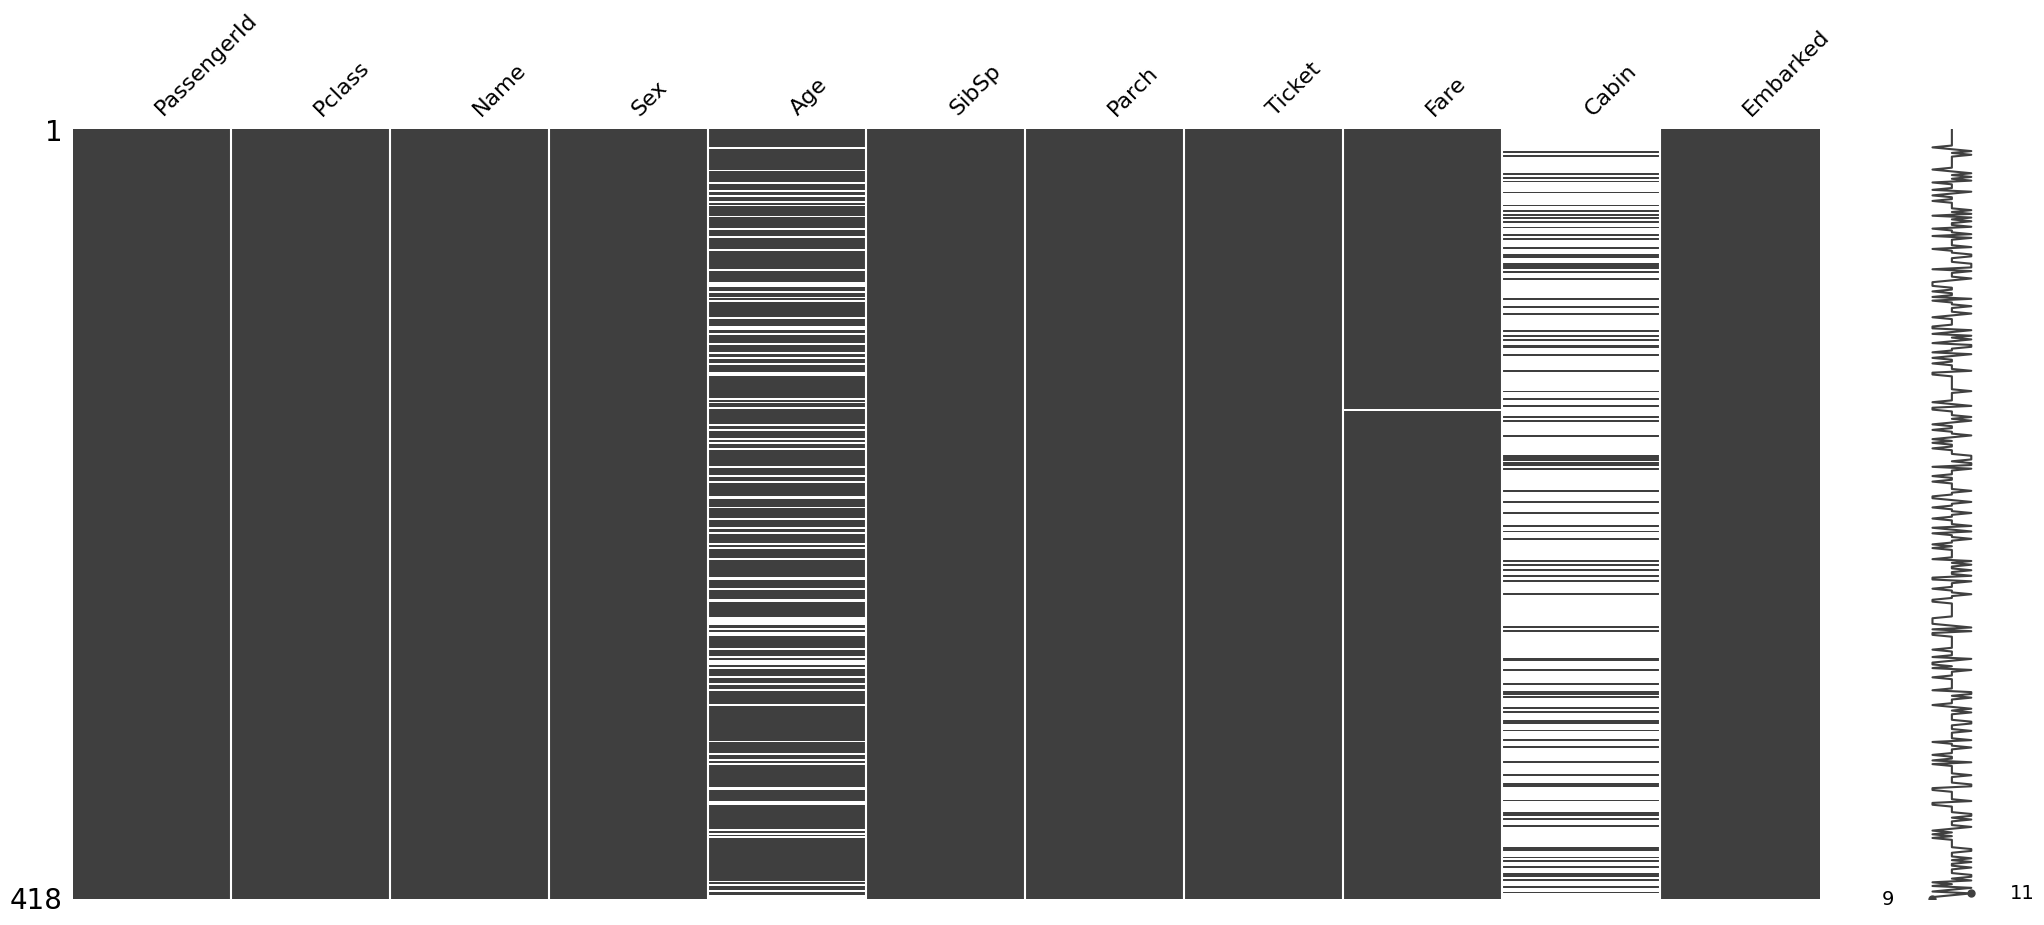

In [1432]:
missingno.matrix(test)

<Axes: >

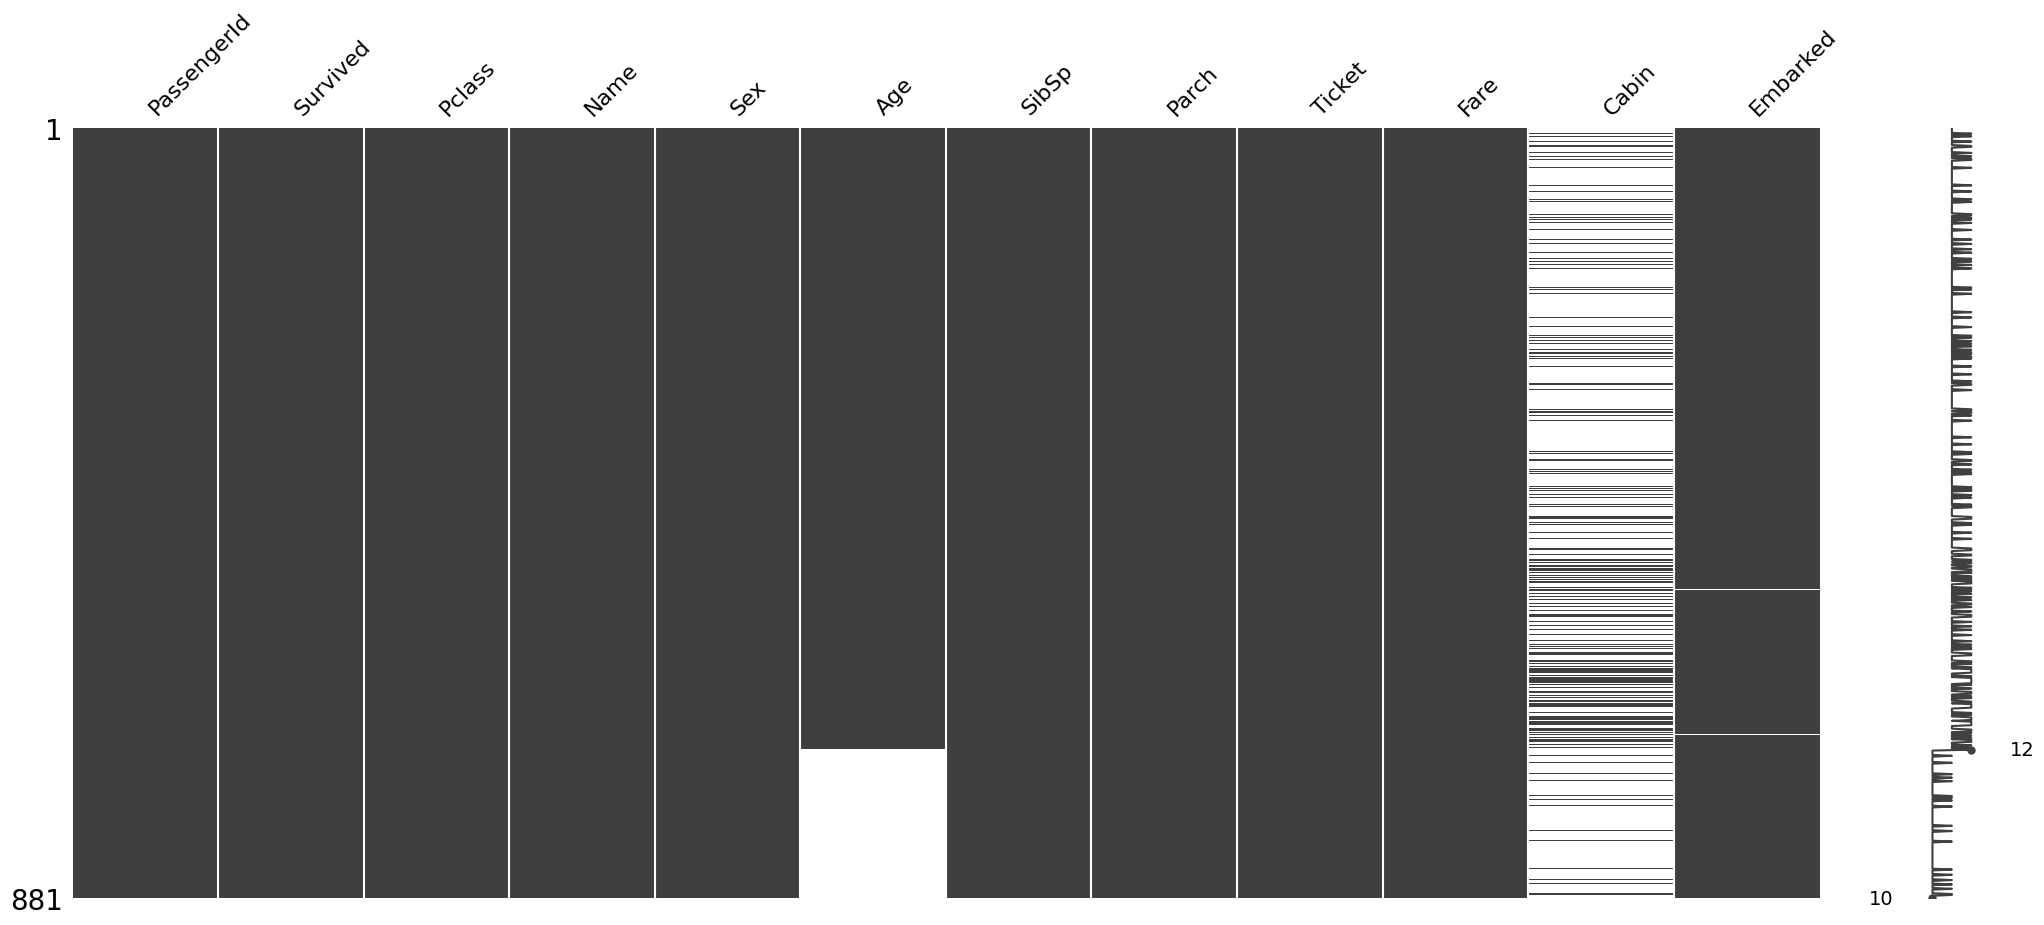

In [1433]:
sorted = train.sort_values('Age')
missingno.matrix(sorted)

### 4. Feature analysis.

#### 4.1 Describing features.

**Categorical:**
- **Nominal**(variables that have two or more categories, but which do not have an intrinsic order.)
   > - **Cabin**
   > - **Embarked**(Port of Embarkation)
            C(Cherbourg)
            Q(Queenstown) 
            S(Southampton)
        
- **Dichotomous**(Nominal variable with only two categories)
   > - **Sex**
            Female
            Male
- **Ordinal**(variables that have two or more categories just like nominal variables. Only the categories can also be ordered or ranked.)
   > - **Pclass** (A proxy for socio-economic status (SES)) 
            1(Upper)
            2(Middle) 
            3(Lower)
***
**Numeric:**
- **Discrete**
  >  - **Passenger ID**(Unique identifing # for each passenger)
  >  - **SibSp**
  >  - **Parch**
  >  - **Survived** (Our outcome or dependent variable)
            0
            1
- **Continous**
>  - **Age**
>  - **Fare**
***
**Text Variable**
> - **Ticket** (Ticket number for passenger.)
> - **Name**(  Name of the passenger.) 

#### 4.2 Categorical features

* 4.2.1 Cabin
* 4.2.2 Point of Embarkation
* 4.2.3 Sex
* 4.2.1 Pclass

##### 4.2.1 Cabin

In [1434]:
train['Cabin'] = train['Cabin'].astype(str)
test['Cabin'] = test['Cabin'].astype(str)


In [1435]:
train.query('Cabin.notnull()').groupby('Cabin')['Survived'].mean()

Cabin
A10    0.000000
A14    0.000000
A16    1.000000
A19    0.000000
A20    1.000000
         ...   
F38    0.000000
F4     1.000000
G6     0.500000
T      0.000000
nan    0.302941
Name: Survived, Length: 148, dtype: float64

##### 4.2.2 Point of Embarkation

In [1436]:
train.Embarked.value_counts()

Embarked
S    634
C    168
Q     77
Name: count, dtype: int64

In [1437]:
train.Embarked.isnull().sum()

2

In [1438]:
train.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339117
Name: Survived, dtype: float64

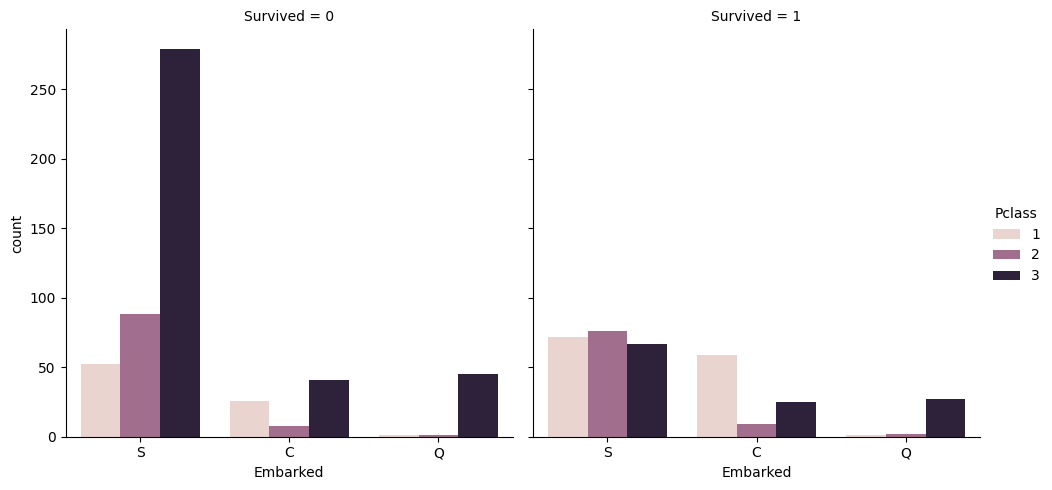

In [1439]:
sns.catplot(data=train, x='Embarked', col='Survived', hue='Pclass' , kind='count' )

##### 4.2.3 Sex

In [1440]:
train.Sex.isnull().sum()

0

In [1441]:
train.Sex.value_counts()

Sex
male      572
female    309
Name: count, dtype: int64

In [1442]:
survival_by_sex = train.groupby('Sex')['Survived'].mean()
survival_by_sex

Sex
female    0.747573
male      0.190559
Name: Survived, dtype: float64

<Axes: xlabel='Sex', ylabel='Survived'>

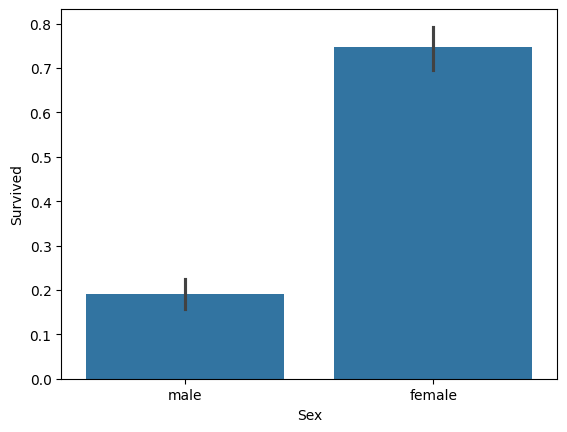

In [1443]:
sns.barplot(data=train, x='Sex', y='Survived')

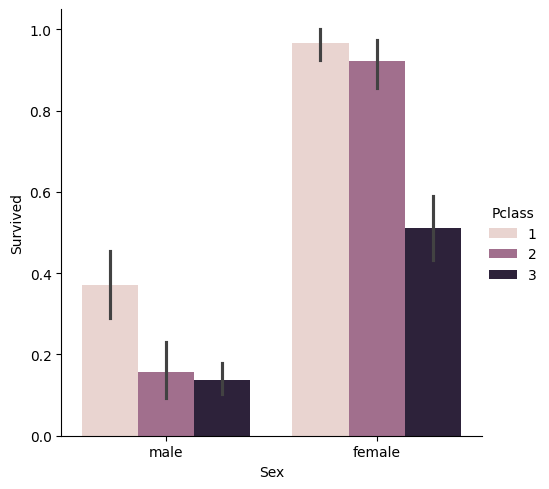

In [1444]:
sns.catplot(data=train, x='Sex', y='Survived', hue='Pclass', kind='bar')

##### 4.2.4 Pclass

In [1445]:
train.Pclass.value_counts()

Pclass
3    484
1    213
2    184
Name: count, dtype: int64

In [1446]:
train[['Parch','SibSp','Age','Pclass','Survived']].groupby('Pclass').mean().sort_values('Survived', ascending=False)

,Parch,SibSp,Age,Survived
Pclass,,,,
1,0.333333,0.380282,38.499563,0.629108
2,0.380435,0.402174,29.877630,0.472826
3,0.369835,0.508264,25.140620,0.245868


In [1447]:
Pclass_sur_mean = train.groupby('Pclass')['Survived'].mean()
Pclass_sur_mean

Pclass
1    0.629108
2    0.472826
3    0.245868
Name: Survived, dtype: float64

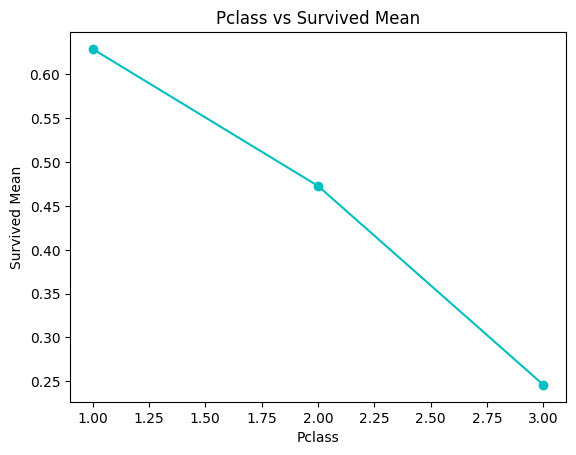

In [1448]:
Pclass_sur_mean.plot(marker='o', linestyle='-', color='c')
plt.title('Pclass vs Survived Mean')
plt.xlabel('Pclass')
plt.ylabel('Survived Mean')

plt.show()

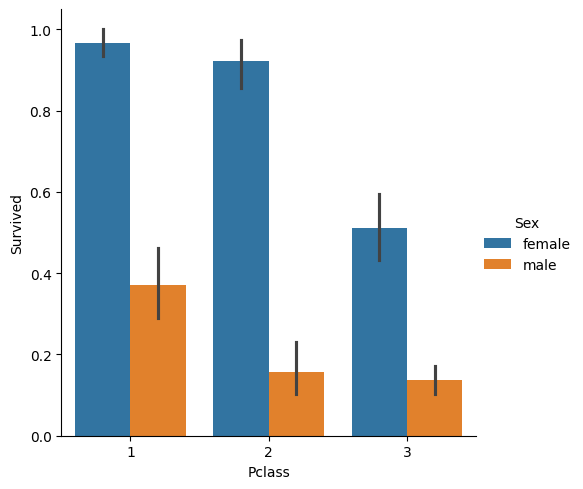

In [1449]:
sns.catplot(data=train, x='Pclass', y='Survived', hue='Sex', kind='bar')

In [1450]:
train[['Pclass', 'Sex']].groupby(['Pclass', 'Sex']).size().unstack(fill_value=0)

Sex,female,male
Pclass,,
1,92,121
2,76,108
3,141,343


In [1451]:
men = train.query('Sex == "male"')['Survived']
men_ratio = sum(men) / len(men)
men_ratio

0.19055944055944055

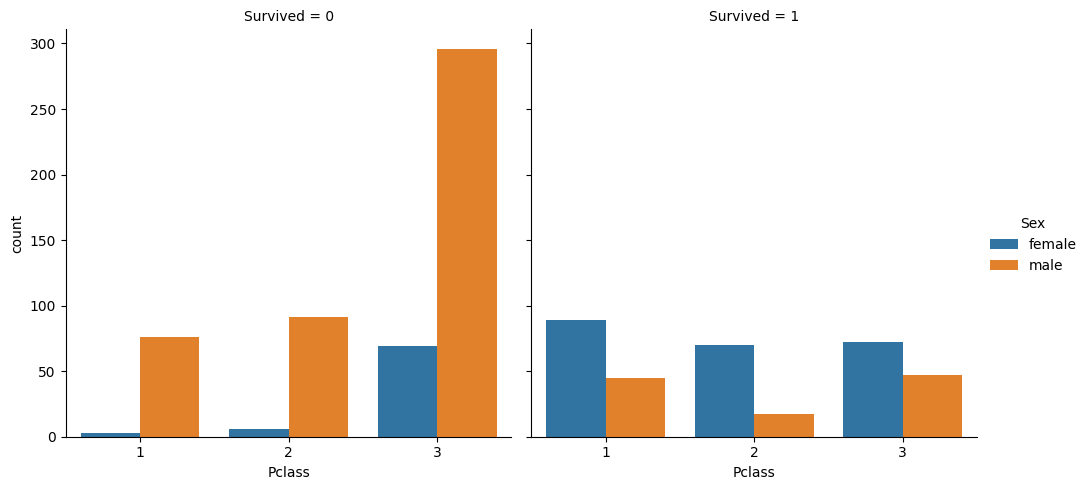

In [1452]:
sns.catplot(data=train, x='Pclass', col='Survived', hue='Sex', kind='count')

#### 4.3 Numerical features.
* 4.3.1 Pearson corelation matrix.
* 4.3.2 Age
* 4.3.3 SibSp
* 4.3.4 Parch
* 4.3.5 Fare

##### 4.3.1 Pearson corelation matrix.

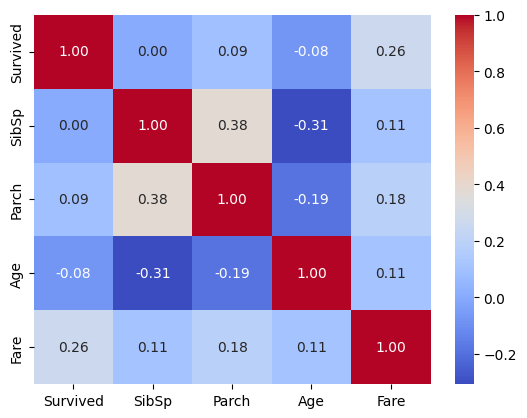

In [1453]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
g = sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

##### 4.3.2 Age.

In [1454]:
train.Age.isnull().sum()

170

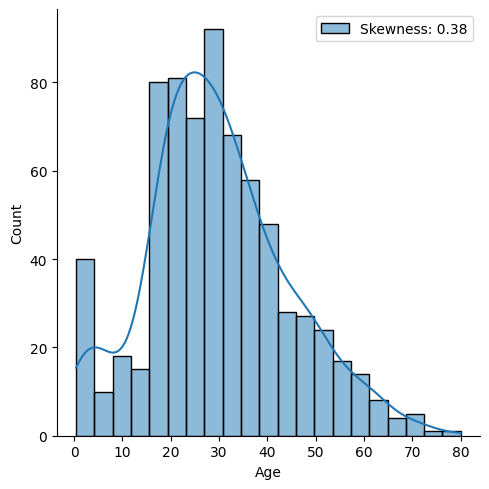

In [1455]:
sns.displot(data=train, x='Age', kde=True, label='Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc='best')

In [1456]:
train.groupby('Age')['Survived'].mean()

Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64

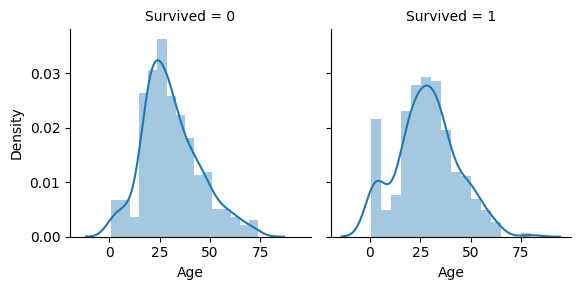

In [1457]:
g = sns.FacetGrid(train, col='Survived')

g.map(sns.distplot, 'Age')

##### 4.3.3 SibSp.

In [1458]:
train.SibSp.value_counts(dropna=False)

SibSp
0    608
1    209
2     28
4     18
3     13
5      5
Name: count, dtype: int64

In [1459]:
train.SibSp.isnull().sum()

0

In [1460]:
train.groupby('SibSp')['Survived'].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.153846
4    0.166667
5    0.000000
Name: Survived, dtype: float64

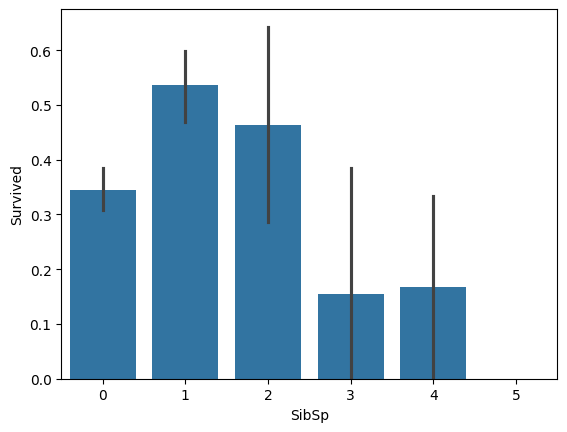

In [1461]:
sns.barplot(data=train, x='SibSp', y='Survived')
plt.show()

#### 4.3.4 Parch.

In [1462]:
train.Parch.value_counts(dropna=False)

Parch
0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [1463]:
train.Parch.isnull().sum()

0

In [1464]:
train.groupby('Parch')['Survived'].mean()

Parch
0    0.343658
1    0.550847
2    0.542857
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

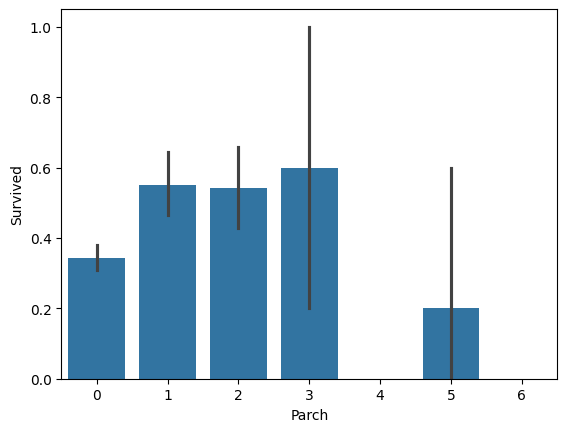

In [1465]:
sns.barplot(data=train, x='Parch', y='Survived')
plt.show()

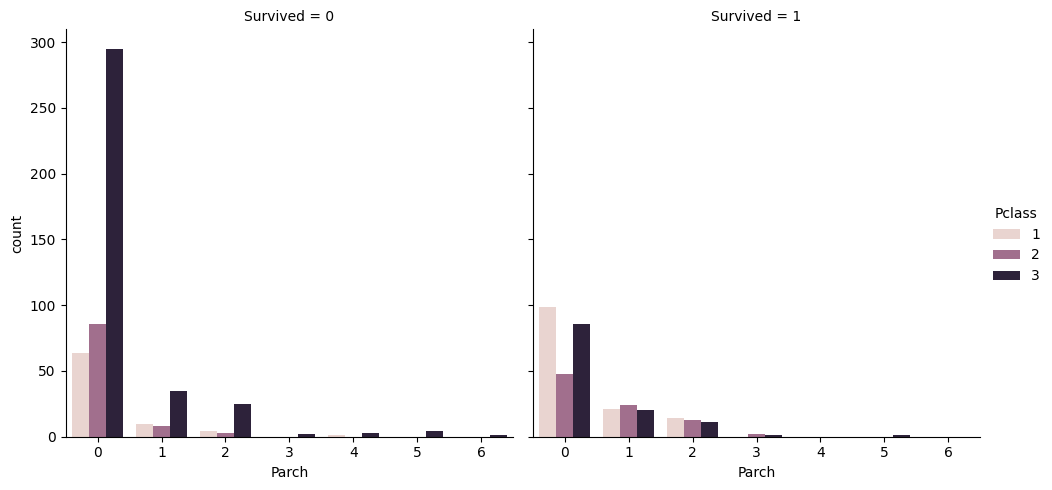

In [1466]:
sns.catplot(data=train, x='Parch', col='Survived', hue='Pclass', kind='count')

##### 4.3.5 Fare

In [1467]:
print('Highest Fare was:',train['Fare'].max())
print('Lowest Fare was:',train['Fare'].min())
print('Average Fare was:',train['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 31.121565607264476


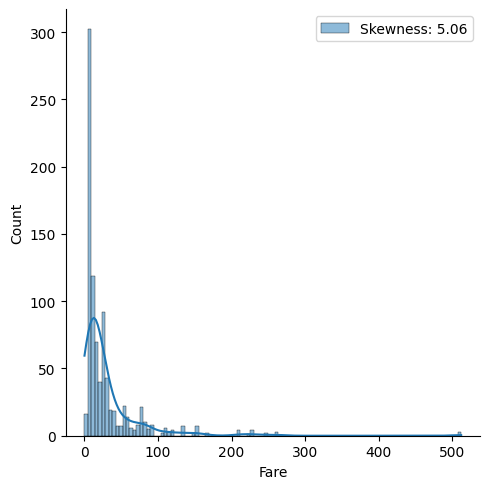

In [1468]:
sns.displot(data=train, x='Fare', kde='True', label='Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc='best')

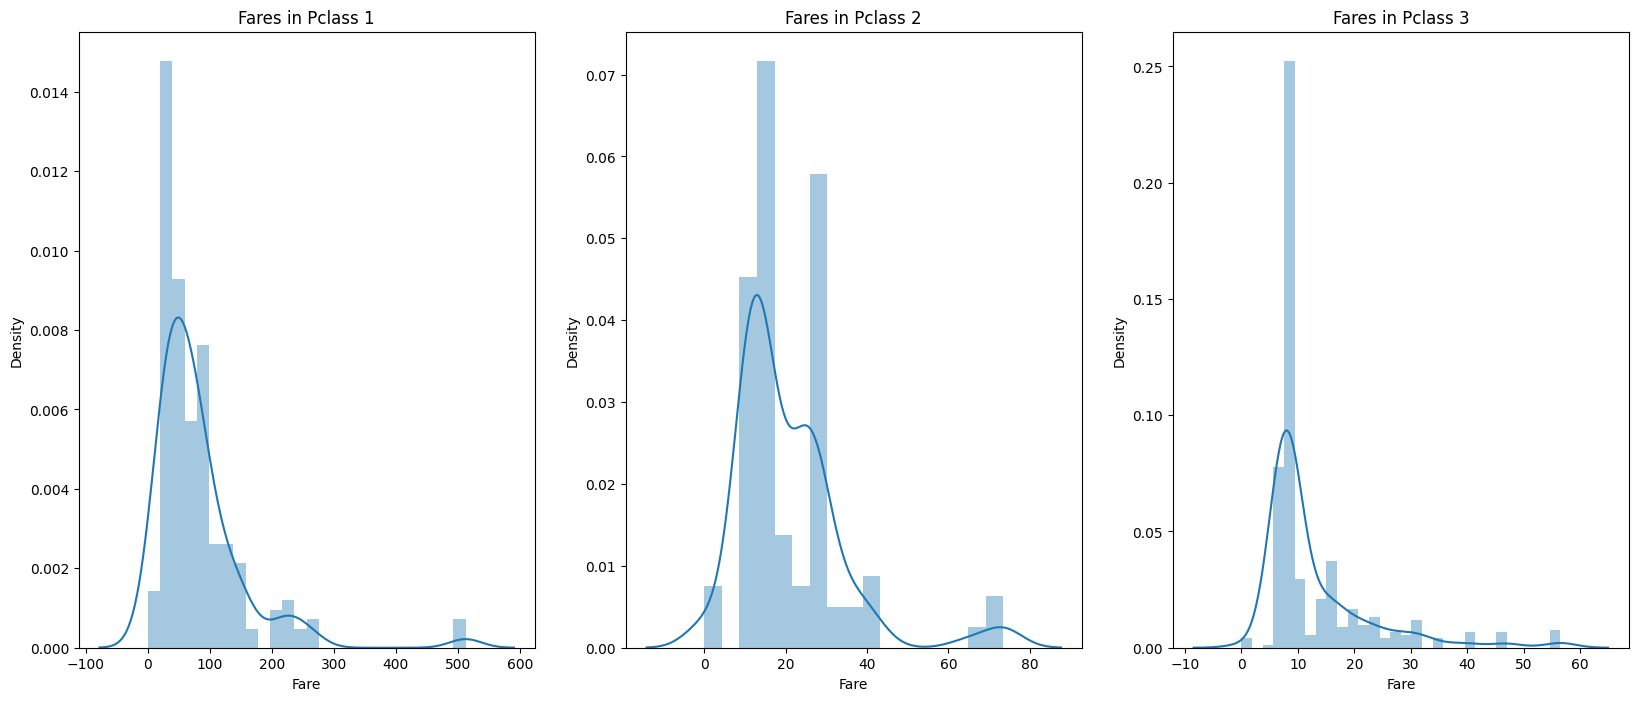

In [1469]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train[train['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train[train['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train[train['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

### 5. Data preprocesing
Data preprocesing is the process of getting our dataset ready for model training.
In this section we will perform the following preprocessing steps:
* 5.1 Concatenating train and test set
* 5.2 Drop and fill missing va in train and test datasets.
*      5.2.1 Embarked.
*      5.2.2 Fare.
*      5.2.3 Age.
* Feature engin.
*      5.1.2 "Title"eering
* Feature e
* Data transformationncoding

#### 5.1 Concatenating train and test set.

In [1470]:
combine = pd.concat([train,test], axis=0).reset_index(drop=True)

#### 5.2 Drop and fill missing va in train and test datasets.

##### 5.2.1 Embarked.

In [1471]:
pd.crosstab([combine.Embarked,combine.Pclass],[combine.Sex,combine.Survived],margins=True).style.background_gradient(cmap='summer_r')

In [1472]:
mode = combine.Embarked.dropna().mode()[0]
mode

'S'

In [1473]:
combine['Embarked'] = combine.Embarked.fillna(mode)

##### 5.2.2 Fare.

In [1474]:
med_fare = combine.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
combine['Fare'] = combine['Fare'].fillna(med_fare)

##### 5.2.3 Age.

In [1475]:
age_by_pclass_sex = combine.groupby(['Sex', 'Pclass'])['Age'].mean()
age_by_pclass_sex

Sex     Pclass
female  1         37.244275
        2         27.499223
        3         22.185329
male    1         41.176133
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [1476]:

age_avg = combine['Age'].mean()
age_std = combine['Age'].std()
age_null_count = combine['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
combine['Age'][np.isnan(combine['Age'])] = age_null_random_list
combine['Age'] = combine['Age'].astype(int)



In [1477]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,nan,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,nan,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,nan,S


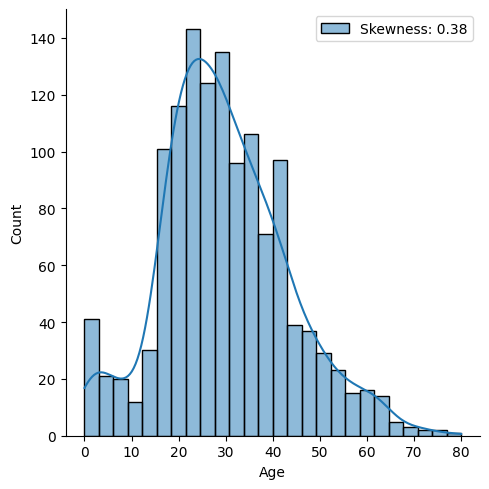

In [1478]:
sns.displot(data=combine, x='Age', kde=True, label='Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc='best')

####  6. Feature engineering.

#### 6.1 Title.

In [1479]:
combine['Title'] = [title.split(',')[1].split('.')[0].strip() for title in combine.Name]

In [1480]:
combine.Title.value_counts()

Title
Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [1481]:
# Convert to categorical values Title 
combine["Title"] = combine["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
combine["Title"] = combine["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
combine["Title"] = combine["Title"].astype(int)

In [1482]:
combine.Title.value_counts()

Title
2    753
1    457
0     60
3     29
Name: count, dtype: int64

In [1483]:
combine[['Title','Survived']].groupby('Title', as_index=False).mean().sort_values('Survived', ascending=False)

,Title,Survived
1,1,0.745098
0,0,0.589744
3,3,0.347826
2,2,0.157895


##### 6.2 Cabin.

In [1484]:
combine.query('Cabin != "nan"  & Pclass == 3')
combine['Cabin_letter'] = combine['Cabin'].str.extract(r'([A-Za-z])')
combine['Cabin_letter'].value_counts()


Cabin_letter
n    1007
C      91
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [1485]:
combine.groupby('Cabin_letter')['Survived'].mean().sort_values(ascending=False)


Cabin_letter
D    0.757576
E    0.750000
B    0.744681
F    0.615385
C    0.589286
G    0.500000
A    0.466667
n    0.302941
T    0.000000
Name: Survived, dtype: float64

In [1486]:
combine[['Cabin_letter', 'Sex']].groupby(['Cabin_letter', 'Sex']).size().unstack(fill_value=0)



Sex,female,male
Cabin_letter,,
A,4,18
B,36,29
C,44,47
D,23,23
E,19,22
F,8,13
G,5,0
T,0,1
n,322,685


In [1487]:
    combine.Cabin.fillna('0', inplace=True)
    combine.loc[combine.Cabin.str[0] == 'A', 'Cabin'] = 1
    combine.loc[combine.Cabin.str[0] == 'B', 'Cabin'] = 2
    combine.loc[combine.Cabin.str[0] == 'C', 'Cabin'] = 3
    combine.loc[combine.Cabin.str[0] == 'D', 'Cabin'] = 4
    combine.loc[combine.Cabin.str[0] == 'E', 'Cabin'] = 5
    combine.loc[combine.Cabin.str[0] == 'F', 'Cabin'] = 6
    combine.loc[combine.Cabin.str[0] == 'G', 'Cabin'] = 7
    combine.loc[combine.Cabin.str[0] == 'T', 'Cabin'] = 8

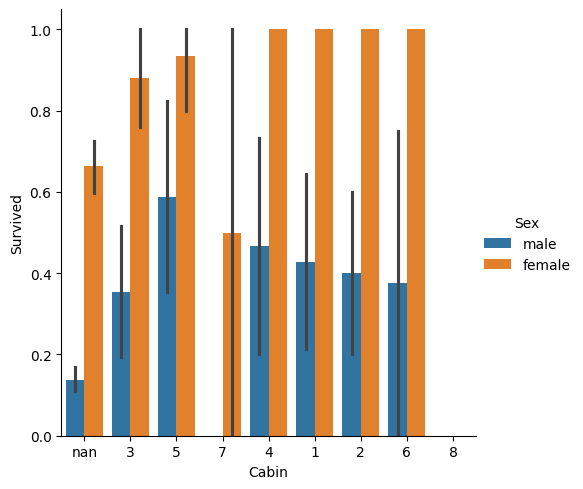

In [1488]:
sns.catplot(data=combine, x='Cabin', y='Survived', hue='Sex', kind='bar')

In [1489]:
combine = combine.drop(['PassengerId', 'Name', 'Cabin_letter','Ticket'],axis=1)

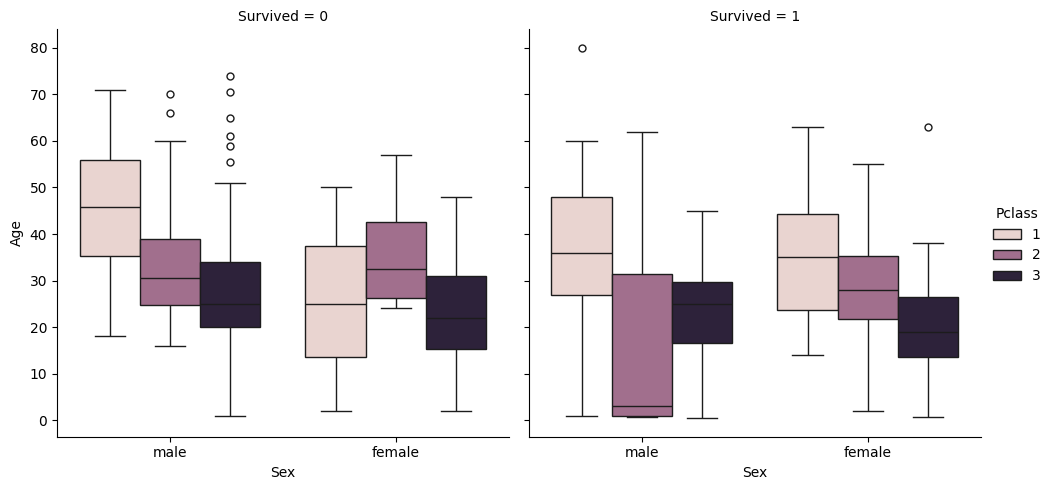

In [1490]:
sns.catplot(data=train, x='Sex', y='Age', col='Survived', hue='Pclass', kind='box')

##### 6.3 Age/Pclass.

In [1491]:
combine['Age'] = combine['Age'].astype(int)
combine['Pclass'] = combine['Pclass'].astype(int)

In [1492]:
combine['Age/Pclass'] = combine['Age'] / combine['Pclass']

#### 6.4 Family Size and Is Alone features.

In [1493]:
combine['Family_size'] = combine.SibSp + combine.Parch + 1


In [1494]:
combine['Family_size'].value_counts()

Family_size
1     790
2     235
3     159
4      43
5      22
6      22
7      16
8       8
11      4
Name: count, dtype: int64

In [1495]:
combine['Is_Alone'] = 0
combine.loc[combine['Family_size']==1, 'Is_Alone'] = 1
combine = combine.drop(['SibSp', 'Parch', 'Family_size'],axis=1)

In [1496]:
combine['Sex'] = combine['Sex'].map({'male': 0, 'female': 1})

In [1497]:
combine.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Age/Pclass,Is_Alone
0,0.0,3,0,22,7.2500,nan,S,2,7.333333,0
1,1.0,1,1,38,71.2833,3,C,1,38.000000,0
2,1.0,3,1,26,7.9250,nan,S,1,8.666667,1
3,1.0,1,1,35,53.1000,3,S,1,35.000000,0
4,0.0,3,0,35,8.0500,nan,S,2,11.666667,1


## 7. Modeling.
* 7.1 Encoding categorical values.
* 7.2 Creating helper function to test all classifiers.
* 7.3 Applying ML models with evaluation (accuracy, f1, precision, recall).
    * Logistic Regression.
    * SVC Support Vector Machines.
    * Linear SVC.
    * SGD - Stochastic Gradient Decent.
    * K- Nearest Neigbours.
    * GNB - Gaussian Naive Base.
    * Perceptron.
    * DTC - Decision Tree CLassifier.
    * RF - Random Forest (ensable method).
    * Catboost.
    * Adaboost.
* 7.4 Compering all models.
* 7.5 Applying PCA, Select-K features.
* 7.6 Creating a pipeline with hyperparameter tuning selected models and cross validation.
* 7.7 Modeling with cross-validation for reference.
* 7.8 Hyperparameter tunning for 4 selected models.

##### 7.1 Encoding categorical values and creating bins for numerical.

In [1498]:
combine.head()


,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Age/Pclass,Is_Alone
0,0.0,3,0,22,7.2500,nan,S,2,7.333333,0
1,1.0,1,1,38,71.2833,3,C,1,38.000000,0
2,1.0,3,1,26,7.9250,nan,S,1,8.666667,1
3,1.0,1,1,35,53.1000,3,S,1,35.000000,0
4,0.0,3,0,35,8.0500,nan,S,2,11.666667,1


In [1499]:
combine = pd.get_dummies(combine, columns=['Embarked'], prefix='Em', dtype=int)
combine = pd.get_dummies(combine, columns=['Cabin'],prefix='Cab_l',dtype=int)

In [1500]:
combine.loc[combine['Fare'] <= 7.91, 'Fare'] = 0
combine.loc[(combine['Fare'] > 7.91) & (combine['Fare'] <= 14.454), 'Fare'] = 1
combine.loc[(combine['Fare'] > 14.454) & (combine['Fare'] <= 31), 'Fare']   = 2
combine.loc[combine['Fare'] > 31, 'Fare'] 							        = 3
combine['Fare'] = combine['Fare'].astype(int)

In [1501]:
    # Mapping Age
combine.loc[ combine['Age'] <= 16, 'Age']= 0
combine.loc[(combine['Age'] > 16) & (combine['Age'] <= 32), 'Age'] = 1
combine.loc[(combine['Age'] > 32) & (combine['Age'] <= 48), 'Age'] = 2
combine.loc[(combine['Age'] > 48) & (combine['Age'] <= 64), 'Age'] = 3
combine.loc[ combine['Age'] > 64, 'Age'] = 4

In [1502]:
combine['Age/Pclass'] = pd.qcut(combine['Age/Pclass'], 5, labels=False)

In [1503]:
combine['Age/Pclass'] = combine['Age/Pclass'].map({0: 0, 1: 1, 2: 2, 3: 3, 4: 4}).astype(int)

In [1504]:
combine.head()

,Survived,Pclass,Sex,Age,Fare,Title,Age/Pclass,Is_Alone,Em_C,Em_Q,Em_S,Cab_l_1,Cab_l_2,Cab_l_3,Cab_l_4,Cab_l_5,Cab_l_6,Cab_l_7,Cab_l_8,Cab_l_nan
0,0.0,3,0,1,0,2,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1.0,1,1,2,3,1,4,0,1,0,0,0,0,1,0,0,0,0,0,0
2,1.0,3,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1
3,1.0,1,1,2,3,1,4,0,0,0,1,0,0,1,0,0,0,0,0,0
4,0.0,3,0,2,1,2,2,1,0,0,1,0,0,0,0,0,0,0,0,1


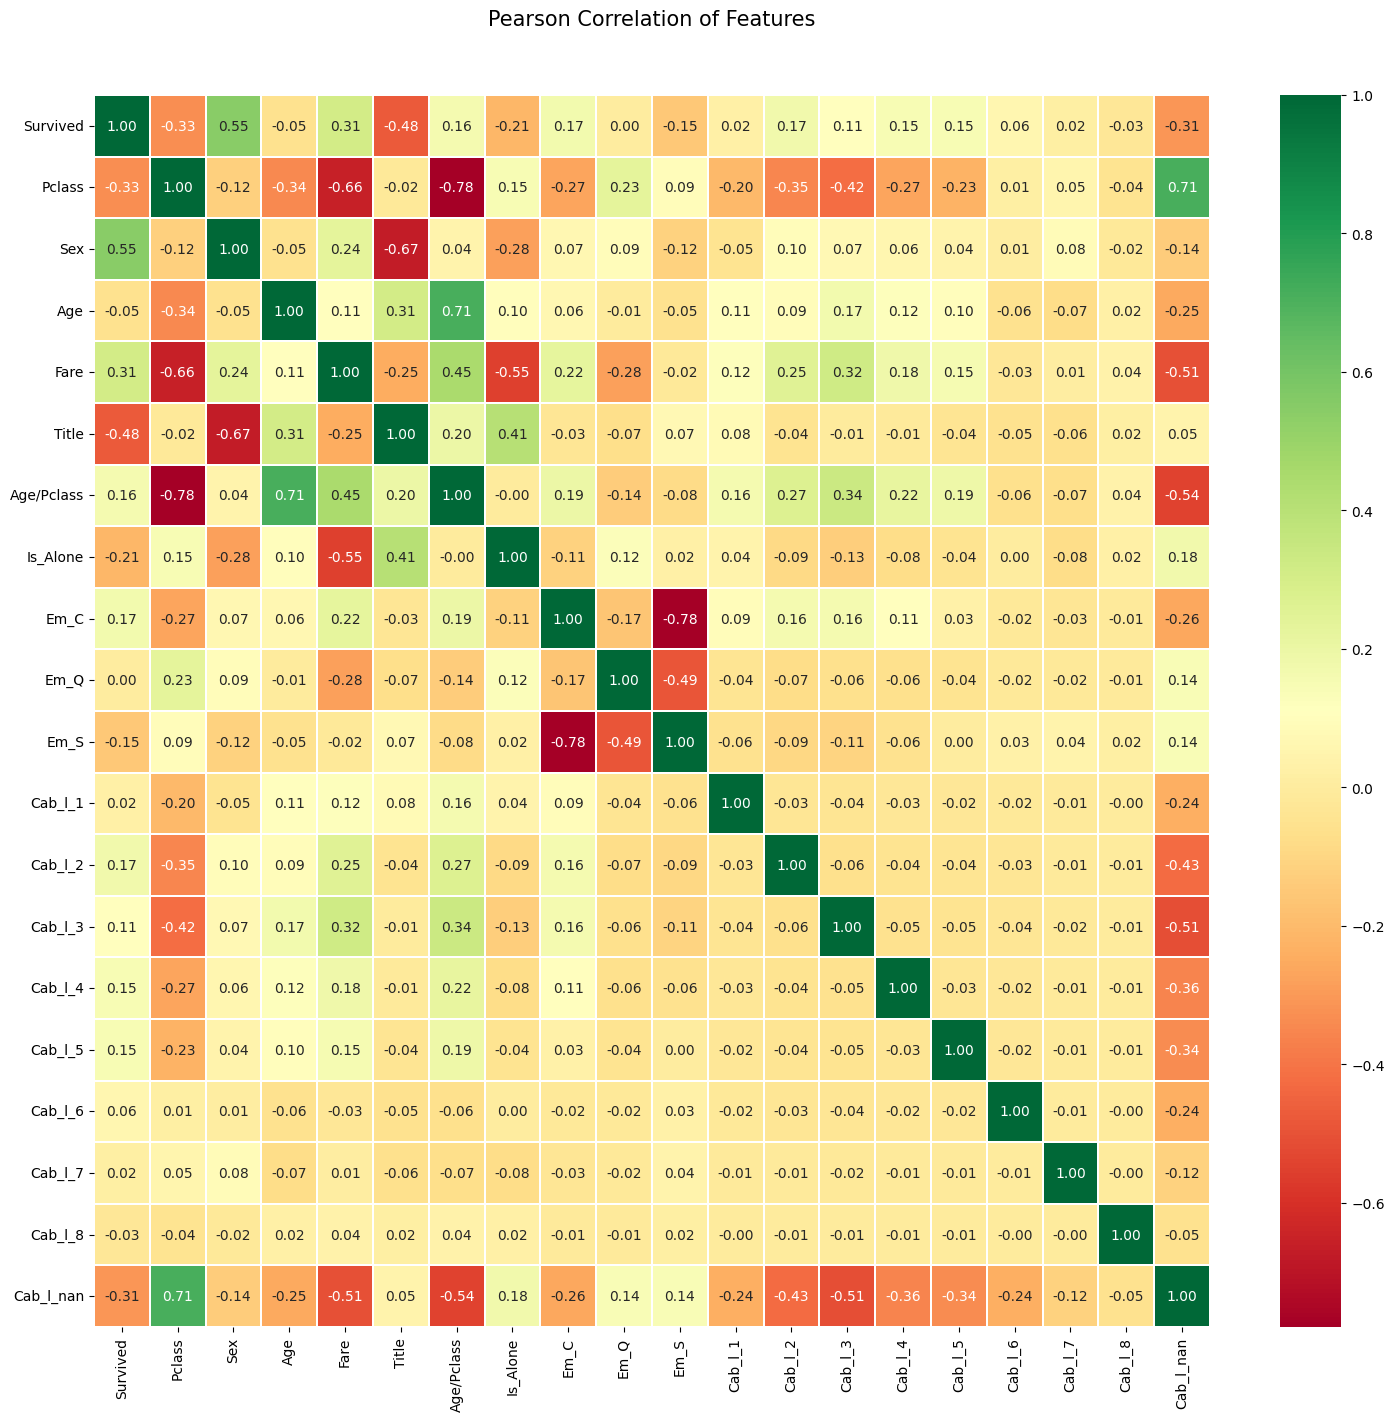

In [1505]:
sns.heatmap(combine.corr(),annot=True, fmt='.2f',cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
plt.title('Pearson Correlation of Features', y=1.05, size=15)
fig.set_size_inches(18,16)
plt.show()

One thing that that the Pearson Correlation plot can tell us is that there are not too many features strongly correlated with one another. This is good from a point of view of feeding these features into your learning model because this means that there isn't much redundant or superfluous data in our training set and we are happy that each feature carries with it some unique information. Here are two most correlated features are that of Age/Class and Age.

In [1506]:
train = combine[:len(train)]
test = combine[len(train):]

In [1507]:
train.shape

(881, 20)

In [1508]:
test.shape

(418, 20)

In [1509]:
features = train.drop('Survived', axis=1)
labels = train['Survived']
s_test = test

In [1510]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

#### 7.2 Creating helper function to test all classifiers.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
PERF_FORMAT_STRING ="\tAccuracy: {:>0.{round}f}\tPrecison: {:>0.{round}f}\tRecall: {:>0.{round}f}\tF1: {:>0.{round}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\
\tFalse negatives: {:4d}\tTrue negatives: {:4d}"
def test_classifier(clf, dataset, feature_list, folds = 100):   
    labels = dataset['Survived']
    features = dataset.drop('Survived', axis=1)
    cv = StratifiedShuffleSplit(n_splits=folds, test_size=0.3, random_state=42)
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    for train_idx, test_idx in cv.split(features, labels):
        train_features = features.iloc[train_idx]
        train_labels = labels.iloc[train_idx]
        test_features = features.iloc[test_idx]
        test_labels = labels.iloc[test_idx]

        clf.fit(train_features, train_labels)
        predictions = clf.predict(test_features)

        for prediction, truth in zip(predictions, test_labels):
            if prediction == 1 and truth == 1:
                true_positive+=1
            elif prediction == 0 and truth == 0:
                true_negative+=1
            elif prediction == 1 and truth == 0:
                false_positive+=1
            elif prediction == 0 and truth == 1:
                false_negative+=1

    try:
        all_predictions = true_positive + true_negative + false_positive + false_negative
        accuracy = (true_positive + true_negative) / all_predictions
        precision = true_positive / (true_positive + false_positive)
        recall = true_positive / (true_positive + false_negative)
        f1 = 2.0 * (precision * recall)  / (precision + recall)
        print("\n")
        print(clf)
        print(PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, round=4))
        print(RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives))
    except ZeroDivisionError:
        print("Warning: Got a divide by zero when trying out:", clf)

### 7.3 Applying ML models with evaluation (accuracy, f1, precision, recall).

In [1511]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score
PERF_FORMAT_STRING =" \tAccuracy: {:>0.{round}f}\tF1_score: {:>0.{round}f}\tPrecision: {:>0.{round}f}\tRecall: {:>0.{round}f} "

In [1512]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_acc = lr_clf.score(X_train, y_train)
lr_f1_score = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
print(PERF_FORMAT_STRING.format(lr_acc, lr_f1_score, lr_precision, lr_recall, round = 4))


 	Accuracy: 0.8003	F1_score: 0.7568	Precision: 0.7241	Recall: 0.7925 


In [1513]:
from sklearn.svm import SVC
svc_clf = SVC()
svc_clf.fit(X_train, y_train)
svc_pred = svc_clf.predict(X_test)
svc_acc = svc_clf.score(X_train, y_train)
svc_f1_score = f1_score(y_test, svc_pred)
svc_precision = precision_score(y_test, svc_pred)
svc_recall = recall_score(y_test, svc_pred)
print(PERF_FORMAT_STRING.format(svc_acc, svc_f1_score, svc_precision, svc_recall, round = 4))

 	Accuracy: 0.8003	F1_score: 0.7281	Precision: 0.7117	Recall: 0.7453 


In [1516]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 5)
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)
knn_acc = knn_clf.score(X_train, y_train)
knn_f1_score = f1_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall =recall_score(y_test, knn_pred)
print(PERF_FORMAT_STRING.format(knn_acc, knn_f1_score, knn_precision, knn_recall, round = 4))

 	Accuracy: 0.8555	F1_score: 0.7337	Precision: 0.7849	Recall: 0.6887 


In [1517]:
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
gnb_pred = gnb_clf.predict(X_test)
gnb_acc = gnb_clf.score(X_train, y_train)
gnb_f1_score = f1_score(y_test, gnb_pred)
gnb_precision = precision_score(y_test, gnb_pred)
gnb_recall = recall_score(y_test, gnb_pred)
print(PERF_FORMAT_STRING.format(gnb_acc, gnb_f1_score, gnb_precision, gnb_recall, round = 4))

 	Accuracy: 0.7435	F1_score: 0.6981	Precision: 0.6981	Recall: 0.6981 


In [1518]:
from sklearn.linear_model import Perceptron

p_clf = Perceptron()
p_clf.fit(X_train, y_train)
p_pred = p_clf.predict(X_test)
p_acc = gnb_clf.score(X_train, y_train)
p_f1_score = f1_score(y_test, p_pred)
p_precision = precision_score(y_test, p_pred)
p_recall = recall_score(y_test, p_pred)
print(PERF_FORMAT_STRING.format(p_acc, p_f1_score, p_precision, p_recall, round = 4))

 	Accuracy: 0.7435	F1_score: 0.6258	Precision: 0.8947	Recall: 0.4811 


In [1514]:
from sklearn.svm import LinearSVC
lsvc_clf = LinearSVC()
lsvc_clf.fit(X_train, y_train)
lsvc_pred = lsvc_clf.predict(X_test)
lsvc_acc = lsvc_clf.score(X_train, y_train)
lsvc_f1_score = f1_score(y_test, lsvc_pred)
lsvc_precision = precision_score(y_test, lsvc_pred)
lsvc_recall =recall_score(y_test, lsvc_pred)
print(PERF_FORMAT_STRING.format(lsvc_acc, lsvc_f1_score, lsvc_precision, lsvc_recall, round = 4))

 	Accuracy: 0.8068	F1_score: 0.7489	Precision: 0.7257	Recall: 0.7736 


In [1515]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
sgd_pred = lsvc_clf.predict(X_test)
sgd_acc = lsvc_clf.score(X_train, y_train)
sgd_f1_score = f1_score(y_test, sgd_pred)
sgd_precision = precision_score(y_test, sgd_pred)
sgd_recall =recall_score(y_test, sgd_pred)
print(PERF_FORMAT_STRING.format(sgd_acc, sgd_f1_score, sgd_precision, sgd_recall, round = 4))

 	Accuracy: 0.8068	F1_score: 0.7489	Precision: 0.7257	Recall: 0.7736 


In [1519]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_acc = gnb_clf.score(X_train, y_train)
dt_f1_score = f1_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
print(PERF_FORMAT_STRING.format(dt_acc, dt_f1_score, dt_precision, dt_recall, round = 4))

 	Accuracy: 0.7435	F1_score: 0.7041	Precision: 0.7667	Recall: 0.6509 


In [1520]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_pred = dt_clf.predict(X_test)
rf_acc = gnb_clf.score(X_train, y_train)
rf_f1_score = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
print(PERF_FORMAT_STRING.format(rf_acc, rf_f1_score, rf_precision, rf_recall, round = 4))

 	Accuracy: 0.7435	F1_score: 0.7041	Precision: 0.7667	Recall: 0.6509 


In [ ]:
from catboost import CatBoostClassifier
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train)
cb_pred = dt_clf.predict(X_test)
cb_acc = gnb_clf.score(X_train, y_train)
cb_f1_score = f1_score(y_test, cb_pred)
cb_precision = precision_score(y_test, cb_pred)
cb_recall = recall_score(y_test, cb_pred)
print(PERF_FORMAT_STRING.format(cb_acc, cb_f1_score, cb_precision, cb_recall, round = 4))

In [1522]:
from sklearn.ensemble import AdaBoostClassifier
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)
ab_pred = dt_clf.predict(X_test)
ab_acc = gnb_clf.score(X_train, y_train)
ab_f1_score = f1_score(y_test, ab_pred)
ab_precision = precision_score(y_test, ab_pred)
ab_recall = recall_score(y_test, ab_pred)
print(PERF_FORMAT_STRING.format(ab_acc, ab_f1_score, ab_precision, ab_recall, round = 4))

 	Accuracy: 0.7435	F1_score: 0.7041	Precision: 0.7667	Recall: 0.6509 


In [1560]:
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())
classifiers.append(AdaBoostClassifier())

cv1_results = []

for classifier in classifiers:
    cv1_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold))
    
cv1_mean = []
cv1_std = []

for result in cv1_results:
    cv1_mean.append(result.mean())
    cv1_std.append(result.std())

cv1_res = pd.DataFrame({'Cross Validation Mean': cv1_mean, 'Cross Validation Std': cv1_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'K-Nearest Neighbours','Gausian Naive Bayes','Perceptron', 'Linear SVC','Stochastic gradnient descent', 'Decision tree', 'Random Forest','CatBoost', 'AdaBoost']})




Learning rate set to 0.008006
0:	learn: 0.6881922	total: 1.41ms	remaining: 1.41s
1:	learn: 0.6838228	total: 2.77ms	remaining: 1.38s
2:	learn: 0.6787217	total: 4.31ms	remaining: 1.43s
3:	learn: 0.6741091	total: 5.75ms	remaining: 1.43s
4:	learn: 0.6691802	total: 7.22ms	remaining: 1.44s
5:	learn: 0.6646499	total: 8.61ms	remaining: 1.43s
6:	learn: 0.6601380	total: 10ms	remaining: 1.42s
7:	learn: 0.6559022	total: 11.5ms	remaining: 1.43s
8:	learn: 0.6511646	total: 12.9ms	remaining: 1.42s
9:	learn: 0.6465112	total: 14.3ms	remaining: 1.41s
10:	learn: 0.6428907	total: 15.3ms	remaining: 1.38s
11:	learn: 0.6384557	total: 16.7ms	remaining: 1.38s
12:	learn: 0.6337623	total: 18.1ms	remaining: 1.38s
13:	learn: 0.6293220	total: 19.5ms	remaining: 1.37s
14:	learn: 0.6250859	total: 20.9ms	remaining: 1.37s
15:	learn: 0.6226291	total: 21.9ms	remaining: 1.35s
16:	learn: 0.6191247	total: 23.5ms	remaining: 1.36s
17:	learn: 0.6152103	total: 24.9ms	remaining: 1.36s
18:	learn: 0.6111424	total: 26.5ms	remaining: 

#### 7.4 Compering all models

In [1523]:
models = pd.DataFrame({'Model': ['Logistic Regression', 'SVC Support Vector Machines', 'Linear SVC', 'SGD - Stochastic Gradient Decent',
                       'K- Nearest Neigbours', 'GNB - Gaussian Naive Base', 'Perceptron', 'DTC - Decision Tree CLassifier',
                       'RF - Random Forest', 'Catboost', 'Adaboost'],
                      'Accuracy': [lr_acc, svc_acc, lsvc_acc, sgd_acc, knn_acc, gnb_acc, p_acc, dt_acc, rf_acc, cb_acc, ab_acc],
                      'F1':[ lr_f1_score, svc_f1_score, lsvc_f1_score, sgd_f1_score, knn_f1_score, gnb_f1_score, p_f1_score, dt_f1_score, rf_f1_score,
                       cb_f1_score, ab_f1_score],
                      'Precision': [lr_precision, svc_precision, lsvc_precision, sgd_precision, knn_precision, gnb_precision, p_precision, 
                       dt_precision, rf_precision, cb_precision, ab_precision],
                      'Recall':[ lr_recall, svc_recall, lsvc_recall, sgd_recall, knn_recall, gnb_recall, p_recall, dt_recall, rf_recall,
                       cb_recall, ab_recall ]}
                     )
models.sort_values('F1', ascending=False)

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.800325,0.756757,0.724138,0.792453
2,Linear SVC,0.806818,0.748858,0.725664,0.773585
3,SGD - Stochastic Gradient Decent,0.806818,0.748858,0.725664,0.773585
4,K- Nearest Neigbours,0.855519,0.733668,0.784946,0.688679
1,SVC Support Vector Machines,0.800325,0.728111,0.711712,0.745283
7,DTC - Decision Tree CLassifier,0.743506,0.704082,0.766667,0.650943
8,RF - Random Forest,0.743506,0.704082,0.766667,0.650943
9,Catboost,0.743506,0.704082,0.766667,0.650943
10,Adaboost,0.743506,0.704082,0.766667,0.650943
5,GNB - Gaussian Naive Base,0.743506,0.698113,0.698113,0.698113


In [1562]:
cv1_res.head().sort_values(by='Cross Validation Mean', ascending=False)

,Cross Validation Mean,Cross Validation Std,Algorithm
1,0.796801,0.056032,Support Vector Machines
2,0.792068,0.068767,K-Nearest Neighbours
0,0.777525,0.042657,Logistic Regression
3,0.707721,0.055120,Gausian Naive Bayes
4,0.672131,0.163477,Perceptron


#### 7.5 Applying helper function to test top 3 classifiers.

In [1564]:
features_list = X_train
test_classifier(classifiers[1], train, features_list)



SVC()
	Accuracy: 0.8044	Precison: 0.7562	Recall: 0.7258	F1: 0.7407


#### 7.6 Applying PCA, Select-KFeatures techniques

In [1525]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)
pca_components = pca.components_
first_pca = pca.components_[0]



[0.5171529  0.21394925 0.0626405  0.05275154 0.04772573 0.02047958
 0.01795934 0.01626481]


In [1528]:
features.shape

(881, 19)

In [1529]:
features_list = features.columns

In [1531]:
from sklearn.feature_selection import SelectKBest, f_classif
kbest = SelectKBest(f_classif, k=10)
kbest.fit_transform(X_train, y_train)

selected_features_indices = kbest.get_support(indices=True)
features_selected = [features_list[i] for i in selected_features_indices]
features_selected

['Pclass',
 'Sex',
 'Fare',
 'Title',
 'Age/Pclass',
 'Is_Alone',
 'Em_C',
 'Em_S',
 'Cab_l_4',
 'Cab_l_nan']

In [1533]:
test_classifier(lr_clf, train, features_selected)



LogisticRegression()
	Accuracy: 0.7975	Precison: 0.7331	Recall: 0.7455	F1: 0.7392


#### 7.7 Creating a pipeline with hyperparameter tuning for selected models and cross validation.

In [1535]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
select = SelectKBest()
lr = LogisticRegression()


steps = [('feature_select', select),
         ('classifier', lr)]

param_grid = {'feature_select__k': [6, 8, 10, 12],
             'classifier__C': [0.001, 0.1, 1, 10],
             'classifier__penalty': ['l1', 'l2'],
             'classifier__solver': ['liblinear', 'lbfgs', ],
             'classifier__class_weight': [None, 'balanced'],
             'classifier__multi_class': ['ovr', 'multinomial'],
             'classifier__tol': [1e-4, 1e-3],
             'classifier__max_iter': [100, 1000],
             'classifier__warm_start': [True, False]}
sss = StratifiedShuffleSplit(100, test_size=0.3, random_state=43)
pipe = Pipeline(steps)
gs = GridSearchCV(pipe, param_grid, cv=sss, scoring='f1')
gs.fit(X_train, y_train)
clf = gs.best_estimator_

In [1537]:
test_classifier(clf, train, features_selected)



Pipeline(steps=[('feature_select', SelectKBest(k=6)),
                ('classifier',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    multi_class='ovr', warm_start=True))])
	Accuracy: 0.7755	Precison: 0.6639	Recall: 0.8440	F1: 0.7432


##### The best parameters for Logistic Regression found by SearchGridCV:
Pipeline(steps=[('feature_select', SelectKBest(k=2)),
                ('classifier',
                 LogisticRegression(C=0.001, class_weight='balanced',
                 multi_class='ovr', solver='liblinear',
                 warm_start=True))])

GridSearchCV results: 
* Accuracy: 0.7868	
* Precison: 0.7077	
* Recall: 0.7601	
* F1: 0.7329

The results before gridsearchcv:
* acc: 0.819805
* precision:0.781818
* recall: 0.754386
* f1: 0.811321

The results of hyperparamter tunning are for some reason worse than before. It mightbe due to narrowing down the parameters befeore running the GridsearchCV due to cpu performance issued. For some reason I can't use multiple cores and I'm unable to manage full GridSearch with just one core.
We will omit those results for now.

#### 7.8 Modeling with cross-validation for reference.

In [1539]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

In [1554]:
# Modeling step with cross validation to Test differents algorithms 
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []

for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold))
    
cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({'Cross Validation Mean':cv_means,'Cross Validation Std': cv_std,'Algorithm':["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

cv_res.head()

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.796801,0.056032,SVC
1,0.803384,0.058425,DecisionTree
2,0.795320,0.065569,AdaBoost
3,0.806690,0.059160,RandomForest
4,0.808302,0.054573,ExtraTrees


<Axes: xlabel='Cross Validation Mean', ylabel='Algorithm'>

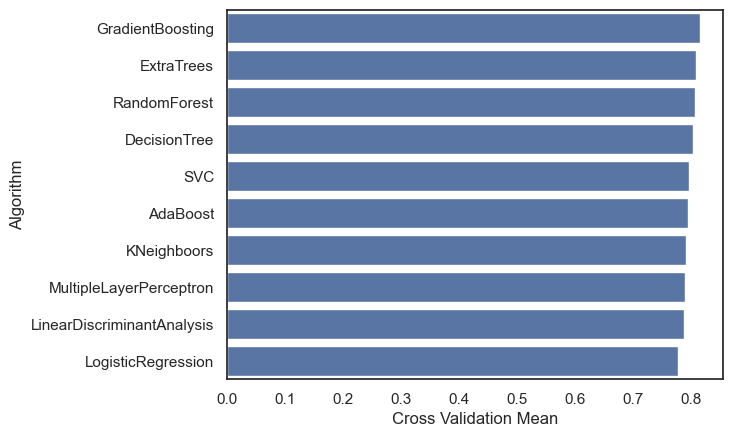

In [1552]:
sns.barplot(data=cv_res, x='Cross Validation Mean', y='Algorithm', order=cv_res.sort_values(by='Cross Validation Mean', ascending=False)['Algorithm'])


#### 7.9 Hyperparameter tunning for 4 best models.

I performed a grid search optimization for AdaBoost, ExtraTrees , RandomForest, GradientBoosting and SVC classifiers.

I set the "n_jobs" parameter to 4 since i have 4 cpu . The computation time is clearly reduced.

But be carefull, this step can take a long time, i took me 15 min in total on 4 cpu.